# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [2]:


#reference : https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673
#reference for 2-D plots : https://www.youtube.com/watch?v=rvzC8ApAjJk
#Attribute Information:

#Age of patient at time of operation (numerical)
#Patient's year of operation (year - 1900, numerical)
#Number of positive axillary nodes detected (numerical)
#Survival status (class attribute)
#1 = the patient survived 5 years or longer
#2 = the patient died within 5 year

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
haberman = pd.read_csv("haberman.csv");
haberman.rename(columns = {"age" : "age", "year" : "operation_Year", "nodes" : "axil_nodes","status" : "survival_status"},inplace = True);
print(haberman);


     age  operation_Year  axil_nodes  survival_status
0     30              64           1                1
1     30              62           3                1
2     30              65           0                1
3     31              59           2                1
4     31              65           4                1
..   ...             ...         ...              ...
301   75              62           1                1
302   76              67           0                1
303   77              65           3                1
304   78              65           1                2
305   83              58           2                2

[306 rows x 4 columns]


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [3]:
#number of data points and features
data_points,features = haberman.shape;
print("DATA POINTS =",data_points);
print("FEATURES =",features);
print("\n");



DATA POINTS = 306
FEATURES = 4




In [4]:
#column names for the dataset
print('Columns:',haberman.columns);
print("\n");

Columns: Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')




In [5]:
#Two classes 
#1 = the patient survived 5 years or longer
#2 = the patient died within 5 year
print(haberman["survival_status"].value_counts());
print("\n");

1    225
2     81
Name: survival_status, dtype: int64




**OBSERVATIONS:-**
1. Number of data points = 306
2. Number of features = 4 ('age', 'year', 'nodes', 'status')
3. Taken two classes-> Class 1 = patient survived 5 years or longer; Class 2 = patient died within 5 years
4. For class 1, there are 225 data points 
5. For class 2, there are 81 data points
6. The no. of data points in class 1 = 225 i.e., 225 patients survived 5 years or longer
7. The no. of data points in class 2 = 81 i.e., 81 patients died within 5 years
8. From the above observations, it can be inferred that the given dataset is not balanced as there are roughly about 
   73.53 percentage of data points in class 1 and 26.47 percentage of of data points in class 2 

### 1.2 - Explain the objective of the problem.
OBJECTIVE : The main objective of the problem is find out what features determine if a patient belongs to CLASS 1 or CLASS 2.
            That is to find out which of the features determine if the patient survived 5 years or longer or if the patient has 
            died within 5 years.
            

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

In [6]:
haberman_1 = haberman.loc[haberman["survival_status"]==1];
haberman_2 = haberman.loc[haberman["survival_status"]==2];

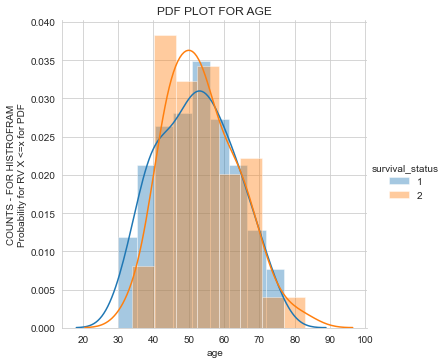

In [127]:
# The rectangle erected for the corresponding counts represent the histogram 
# The smoothed line represents the PDF
sns.FacetGrid(haberman,hue="survival_status",height = 5)\
   .map(sns.distplot,"age") \
   .add_legend();
plt.title("PDF PLOT FOR AGE");
plt.ylabel("COUNTS - FOR HISTROFRAM\nProbability for RV X <=x for PDF");
plt.show()

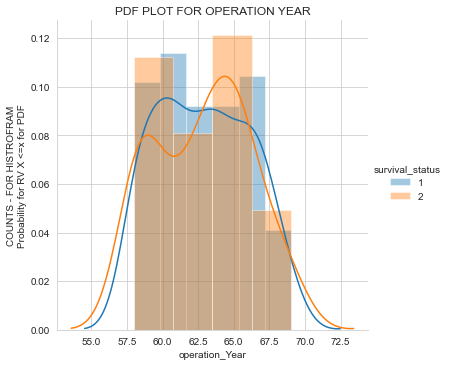

In [128]:
# The rectangle erected for the corresponding counts represent the histogram 
# The smoothed line represents the PDF
sns.FacetGrid(haberman, hue="survival_status",height = 5) \
   .map(sns.distplot,"operation_Year") \
   .add_legend();
plt.title("PDF PLOT FOR OPERATION YEAR"); 
plt.ylabel("COUNTS - FOR HISTROFRAM\nProbability for RV X <=x for PDF");
plt.show();


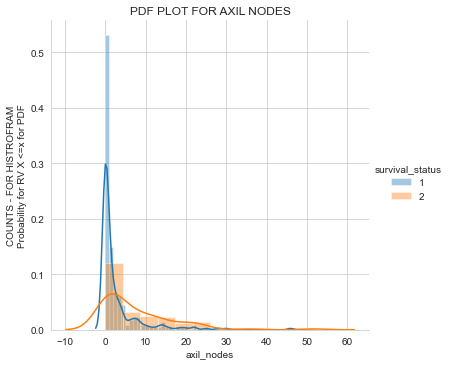

In [129]:
# The rectangle erected for the corresponding counts represent the histogram 
# The smoothed line represents the PDF
sns.FacetGrid(haberman, hue="survival_status", height = 5) \
   .map(sns.distplot,"axil_nodes") \
   .add_legend();
plt.title("PDF PLOT FOR AXIL NODES");
plt.ylabel("COUNTS - FOR HISTROFRAM\nProbability for RV X <=x for PDF");
plt.show();

**OBSERVATION (from PDFs):**
1. It can be observaed from the pdf of axil_nodes that the distribution of patients belonging to CLASS 1 or CLASS 2 can be     
   separated to an extent compared to operation_Year and age.
2. Distribution of operation_Year and age of the patient do not provide any information as to whether the patient belongs to 
   CLASS 1 or CLASS 2 due to overlapping.
3. Patients belonging to age groups 50-60 were more likely to not survive.
4. Patients belonging to operation_Year between 1965-1970 were more likely to not survive.
5. Patients with axil_nodes less than five are more likely to survive 5 years to more.

PROBABILITY DENSITY FUNCTION = [0.03111111 0.04       0.08888889 0.07555556 0.07555556 0.06666667
 0.09777778 0.14222222 0.08888889 0.07555556 0.07111111 0.05777778
 0.04444444 0.02666667 0.01777778]
CUMMULATIVE DENSITY FUNCTION: [0.03111111 0.07111111 0.16       0.23555556 0.31111111 0.37777778
 0.47555556 0.61777778 0.70666667 0.78222222 0.85333333 0.91111111
 0.95555556 0.98222222 1.        ]


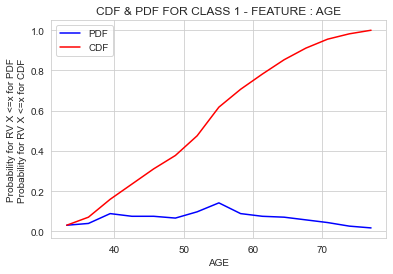

In [65]:
#reference for bin size ---> https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/


#CDF FOR FEATURE : AGE
#CLASS 1 
#Number of data points for CLASS 1, (survival_status = 1) = 225
#Number of bins = sqrt(Number 0f data points) => sqrt(225) = 15 bins
counts, bin_edges = np.histogram(haberman_1["age"],bins = 15, density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
print("PROBABILITY DENSITY FUNCTION =",pdf); print("CUMMULATIVE DENSITY FUNCTION:",cdf);
plt.plot(bin_edges[1:],pdf,'blue');
plt.plot(bin_edges[1:],cdf,color = 'red');
plt.xlabel("AGE"); 
plt.ylabel("Probability for RV X <=x for PDF\nProbability for RV X <=x for CDF ");
plt.legend(["PDF","CDF"]);
plt.title("CDF & PDF FOR CLASS 1 - FEATURE : AGE");
plt.show();

PROBABILITY DENSITY FUNCTION: [0.04938272 0.14814815 0.20987654 0.22222222 0.13580247 0.12345679
 0.07407407 0.01234568 0.02469136]
CUMMULATIVE DISTRIBUTION FUNCTION [0.04938272 0.19753086 0.40740741 0.62962963 0.7654321  0.88888889
 0.96296296 0.97530864 1.        ]
62.20000000000002


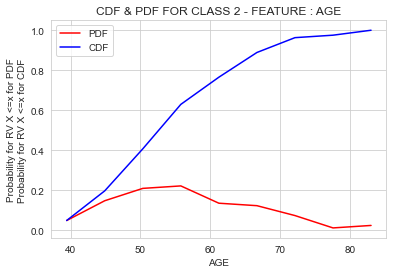

In [72]:
#CLASS 2
#Number of data points for CLASS 2, (survival_status = 2) = 81
#Number of bins = sqrt(Number of data points) = sqrt(81) = 9
counts, bin_edges = np.histogram(haberman_2["age"],bins = 9,density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
print("PROBABILITY DENSITY FUNCTION:",pdf);
print("CUMMULATIVE DISTRIBUTION FUNCTION",cdf);
plt.plot(bin_edges[1:],pdf,color = "red");
plt.plot(bin_edges[1:],cdf,color = "blue");
plt.xlabel("AGE");
plt.ylabel("Probability for RV X <=x for PDF\nProbability for RV X <=x for CDF ");
plt.title("CDF & PDF FOR CLASS 2 - FEATURE : AGE");
plt.legend(["PDF","CDF"]);
print(np.percentile(haberman_1["age"],80))

# **OBERSAVTIONS(from CDF) - FEATURE : AGE-**
1. 80% of the people below 62 years of age survived 5 years or more.
2. 80% of the people below 62 years of age did not survive.

PROBABILITY DENSITY FUNCTION: [0.10666667 0.08       0.10666667 0.         0.10222222 0.07111111
 0.09777778 0.         0.10222222 0.06666667 0.09777778 0.
 0.09333333 0.04444444 0.03111111]

CUMMULATIVE DISTRIBUTION FUNCTION [0.10666667 0.18666667 0.29333333 0.29333333 0.39555556 0.46666667
 0.56444444 0.56444444 0.66666667 0.73333333 0.83111111 0.83111111
 0.92444444 0.96888889 1.        ]


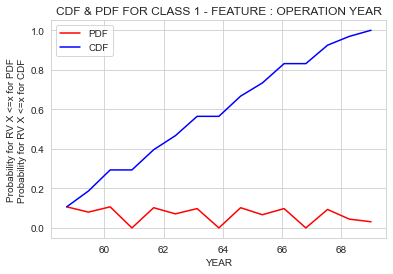

In [67]:
#CDF FOR FEATURE : operation_Year
#CLASS 1 
#Number of data points for CLASS 1, (survival_status = 1) = 225
#Number of bins = sqrt(Number 0f data points) => sqrt(225) = 15 bins
counts, bin_edges = np.histogram(haberman_1["operation_Year"],bins = 15, density = True);
pdf = counts/(sum(counts)); 
cdf = np.cumsum(pdf);
print("PROBABILITY DENSITY FUNCTION:", pdf);
print("\nCUMMULATIVE DISTRIBUTION FUNCTION", cdf);
plt.plot(bin_edges[1:],pdf,color = "red");
plt.plot(bin_edges[1:],cdf,color = "blue");
plt.xlabel("YEAR");
plt.ylabel("Probability for RV X <=x for PDF\nProbability for RV X <=x for CDF ");
plt.title("CDF & PDF FOR CLASS 1 - FEATURE : OPERATION YEAR");
plt.legend(["PDF","CDF"]);
plt.show();


PROBABILITY DENSITY FUNCTION: [0.25925926 0.04938272 0.03703704 0.08641975 0.19753086 0.16049383
 0.07407407 0.04938272 0.08641975]

CUMMULATIVE DISTRIBUTION FUNCTION [0.25925926 0.30864198 0.34567901 0.43209877 0.62962963 0.79012346
 0.86419753 0.91358025 1.        ]


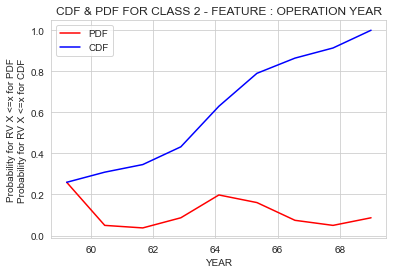

In [68]:
#CLASS 2
#Number of data points for CLASS 2, (survival_status = 2) = 81
#Number of bins = sqrt(Number 0f data points) => sqrt(225) = 9 bins
counts, bin_edges = np.histogram(haberman_2["operation_Year"],bins = 9, density = True);
pdf = counts/(sum(counts)); 
cdf = np.cumsum(pdf);
print("PROBABILITY DENSITY FUNCTION:", pdf);
print("\nCUMMULATIVE DISTRIBUTION FUNCTION", cdf);
plt.plot(bin_edges[1:],pdf,color = "red");
plt.plot(bin_edges[1:],cdf,color = "blue");
plt.xlabel("YEAR"); plt.ylabel("Probability for RV X <=x for PDF\nProbability for RV X <=x for CDF ");
plt.title("CDF & PDF FOR CLASS 2 - FEATURE : OPERATION YEAR");
plt.legend(["PDF","CDF"]);
plt.show();


# **OBSERVATIONS(from CDF) - FEATURE : OPERATION YEAR-**
1. 90% of the people who had undergone operation till the year 1968 survived 5 years or longer.
2. The rate of death was high for the patients who had undergone operation between the years 1963-1966

PROBABILITY DENSITY FUNCTION: [0.79111111 0.07111111 0.05333333 0.01777778 0.02222222 0.00888889
 0.00888889 0.00888889 0.00444444 0.00888889 0.         0.
 0.         0.         0.00444444]

CUMMULATIVE DISTRIBUTION FUNCTION [0.79111111 0.86222222 0.91555556 0.93333333 0.95555556 0.96444444
 0.97333333 0.98222222 0.98666667 0.99555556 0.99555556 0.99555556
 0.99555556 0.99555556 1.        ]


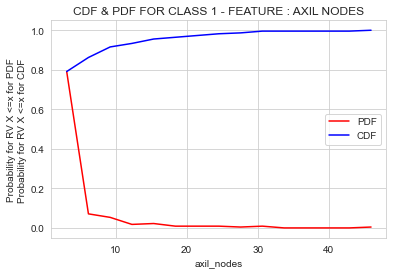

In [91]:
#CDF FOR FEATURE : axil_nodes
#CLASS 1 
#Number of data points for CLASS 1, (survival_status = 1) = 225
#Number of bins = sqrt(Number 0f data points) => sqrt(225) = 15 bins
counts, bin_edges = np.histogram(haberman_1["axil_nodes"],bins = 15, density = True);
pdf = counts/(sum(counts)); 
cdf = np.cumsum(pdf);
print("PROBABILITY DENSITY FUNCTION:", pdf);
print("\nCUMMULATIVE DISTRIBUTION FUNCTION", cdf);
plt.plot(bin_edges[1:],pdf,color = "red");
plt.plot(bin_edges[1:],cdf,color = "blue");
plt.xlabel("axil_nodes"); plt.ylabel("Probability for RV X <=x for PDF\nProbability for RV X <=x for CDF ");
plt.title("CDF & PDF FOR CLASS 1 - FEATURE : AXIL NODES");
plt.legend(["PDF","CDF"]);
plt.show();


PROBABILITY DENSITY FUNCTION: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]

CUMMULATIVE DISTRIBUTION FUNCTION [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


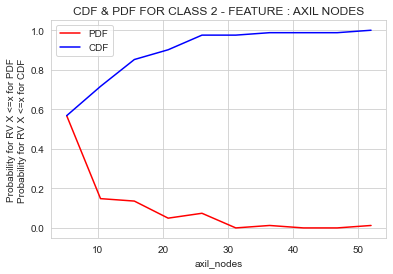

4.0


In [125]:
#CLASS 2
#Number of data points for CLASS 2, (survival_status = 2) = 81
#Number of bins = sqrt(Number 0f data points) => sqrt(81) = 9 bins
counts, bin_edges = np.histogram(haberman_2["axil_nodes"],bins = 10, density = True);
pdf = counts/(sum(counts)); 
cdf = np.cumsum(pdf);
print("PROBABILITY DENSITY FUNCTION:", pdf);
print("\nCUMMULATIVE DISTRIBUTION FUNCTION", cdf);
plt.plot(bin_edges[1:],pdf,color = "red");
plt.plot(bin_edges[1:],cdf,color = "blue");
plt.xlabel("axil_nodes"); plt.ylabel("Probability for RV X <=x for PDF\nProbability for RV X <=x for CDF ");
plt.title("CDF & PDF FOR CLASS 2 - FEATURE : AXIL NODES");
plt.legend(["PDF","CDF"]);
plt.show();
print(np.percentile(haberman_1["axil_nodes"],83.4))

# **OBSERVATIONS(from CDF) - FEATURE : AXIL NODES**
1. About 92% of the patients survived 5 years or longer with axil nodes less than 10.
2. 50% of the patients survived with axil nodes less than or equal to 0.
3. 79% of the patients survived with axil nodes in the range [0,3].
4. If the patients axil nodes lie within the range [0,4], he or she has 83.4% probability of survival.
5. About 80% of the patients did not survive with axil nodes less than or equal to 13.

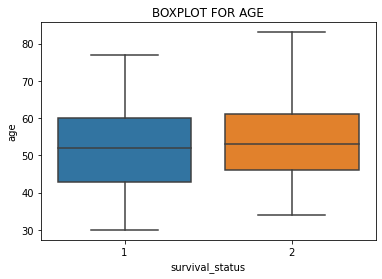

In [42]:
#BOXPLOT for age:
sns.boxplot(x="survival_status",y="age",data = haberman);
plt.title("BOXPLOT FOR AGE");
plt.show();

# **OBSERVATION(from boxplot) - FEATURE:AGE**
1. CLASS 1 : PEOPLE WHO SURVIVED 5 YEARS OR MORE
    - [75th percentile value = 60, 50th percentile value = 52, 25th percentile value = 44]
    - 75% of the patients with age less than 60 survived 5 years or more.
    - 50% of the patients with age less than 52 survived 5 years or more.
    - 25% of the patients with age less than 43 survived 5 years or more.
2. CLASS 2 : PEOPLE WHO DID NOT SURVIVE
    -  [75th percentile value = 61; 50th percentile value = 53; 25th percentile value = 46]
    -  75% of the patients with age less than 61 did not survive.
    -  50% of the patients with age less than 53 did not survive.
    -  25% of the patients with age less than 46 did not survive.
3. The boxplot for the feature:age does not have any outliers. That is the observation does not lie beyond 
    1.5*(INTERQUARTILE_RANGE).
4. From the given boxplots for age, it can be inferred that the overlap is immense and the feature age cannot be used to 
   determine if the patient belongs to CLASS 1 or CLASS 2.

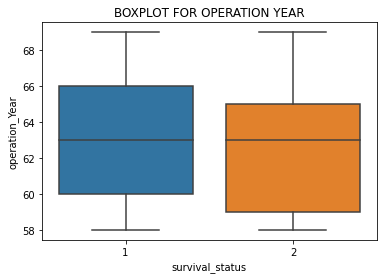

In [43]:
#BOXPLOT for year
sns.boxplot(x="survival_status", y="operation_Year", data =haberman);
plt.title("BOXPLOT FOR OPERATION YEAR");
plt.show();

# OBESERVATION(from boxplot) - FEATURE:OPERATION YEAR
1. CLASS 1 : PEOPLE WHO SURVIVED 5 YEARS OR MORE
    - [75th percentile value = 1966; 50th percentile value = 1963; 25th percentile value = 1960]
    - 75% of the patients who had undergone operation in the years prior to 1966 survived.
    - 50% of the patients who had undergone operation in the years prior to 1963 survived.
    - 25% of the patients who had undergone operation in the years prior to 1960 survived.
2.  CLASS 2 : PEOPLE WHO DID NOT SURVIVE
    - [75th percentile value = 1965; 50th percentile value = 1963; 25th percentile value = 1959]
    - 75% of the patients who had undergone operation in the years prior to 1965 did not survive.
    - 50% of the patients who had undergone operation in the years prior to 1963 did not survive.
    - 25% of the patients who had undergone operation in the years prior to 1959 did not survive.
3. The boxplot for the feature:operation_Year does not have any outliers. That is no data point beyond 
    1.5*(INTERQUARTILE_RANGE).
4. Just as the case with feature age, due to the overlap the survival status of the patient cannot be accurately 
   determined with operation_Year alone as a feature.

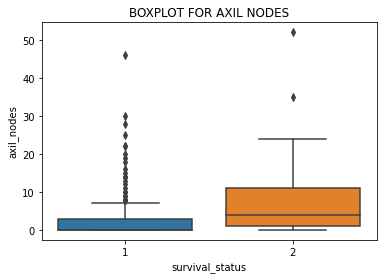

In [47]:
#BOXPLOT for axil nodes
sns.boxplot(x="survival_status", y="axil_nodes", data=haberman);
plt.title("BOXPLOT FOR AXIL NODES");
plt.show();



# **OBSERVATION(from boxplot) - FEATURE:AXIL NODES
1. CLASS 1 : PEOPLE WHO SURVIVED 5 YEARS OR MORE
    - [75th percentile value = 3; 50th percentile value = 0; 25th percentile value = 0]
    - 75% of the patients who had axil nodes less than 3 survived 5 years or more.
    - The boxplot corresponding to survival_status = 1 (CLASS 1) has a number of outliers.
2.  CLASS 2 : PEOPLE WHO DID NOT SURVIVE
    - [75th percentile value = 11; 50th percentile value = 4; 25th percentile value = 1]
    - 75% of the patients who had axil nodes less than 11 did not survive.
    - 50% of the patients who had axil nodes less than 4 did not survive.
    - 25% of the patients who had axil nodes less than 1 did not survive.
    - The boxplot corresponding to survival_status = 2 (CLASS 2) has one outlier.


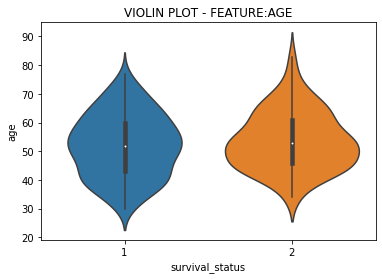

In [48]:
#violin plot for age
sns.violinplot(x="survival_status", y="age", data=haberman, size=10);
plt.title("VIOLIN PLOT - FEATURE:AGE");
plt.show();

# **OBSERVATION(for violinplot) - FEATURE :AGE**
There is a huge portion of overlap between the two violinplot for age. Hence age alone cannot be used as a feature to determine
if a patient belongs to CLASS 1 or CLASS 2.

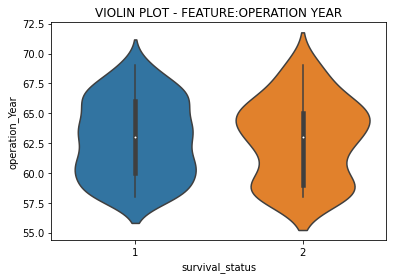

In [49]:
#violin plot for year
sns.violinplot(x="survival_status", y="operation_Year", data=haberman, size=10);
plt.title("VIOLIN PLOT - FEATURE:OPERATION YEAR");
plt.show();

# **OBSERVATION(for violinplot) - FEATURE:OPERATION YEAR**
Just as the case of violinplot for age, there is a huge overlap between the two plots. Hence operation_Year alone cannot be used 
as a feature to determine if a patient belongs to CLASS 1 or CLASS 2.

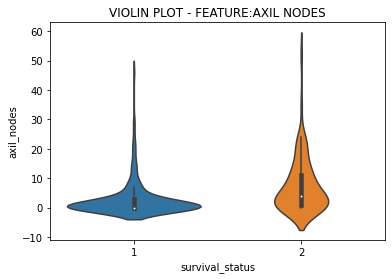

In [50]:
#boxplot for axil nodes
sns.violinplot(x="survival_status", y="axil_nodes", data=haberman, size=10);
plt.title("VIOLIN PLOT - FEATURE:AXIL NODES")
plt.show();

# **OBSERVATION(for violinplot) - FEATURE:AXIL NODES**
1. The patients with axil_nodes less than or equal to zero survived.
2. The patients with axil_nodes greater than one did not survive.
3. As the number of axil_nodes increase, the patient is more likely to not survive.

In [139]:
#STATISTICAL ANALYSIS
print("MEANS:");
print("FEATURE-AGE");
print("CLASS 1: ",np.mean(haberman_1["age"]));
print("CLASS 2: ",np.mean(haberman_2["age"]));

print("\nFEATURE-OPERATION YEAR");
print("CLASS 1: ",np.mean(haberman_1["operation_Year"]));
print("CLASS 2: ",np.mean(haberman_2["operation_Year"]));

print("\nFEATURE-AXIL NODES");
print("CLASS 1: ",np.mean(haberman_1["axil_nodes"]));
print("CLASS 2: ",np.mean(haberman_2["axil_nodes"]));

print("\n\nSTANDARD DEVIATION:");
print("FEATURE-AGE");
print("CLASS 1: ",np.std(haberman_1["age"]));
print("CLASS 2: ",np.std(haberman_2["age"]));

print("\nFEATURE-OPERATION YEAR");
print("CLASS 1: ",np.std(haberman_1["operation_Year"]));
print("CLASS 2: ",np.std(haberman_2["operation_Year"]));

print("\nFEATURE-AXIL NODES");
print("CLASS 1: ",np.std(haberman_1["axil_nodes"]));
print("CLASS 2: ",np.std(haberman_2["axil_nodes"]));

print("\n\nMEDIAN:");
print("FEATURE-AGE");
print("CLASS 1: ",np.median(haberman_1["age"]));
print("CLASS 2: ",np.median(haberman_2["age"]));

print("\nFEATURE-OPERATION YEAR");
print("CLASS 1: ",np.median(haberman_1["operation_Year"]));
print("CLASS 2: ",np.median(haberman_2["operation_Year"]));

print("\nFEATURE-AXIL NODES");
print("CLASS 1: ",np.median(haberman_1["axil_nodes"]));
print("CLASS 2: ",np.median(haberman_2["axil_nodes"]));

print("\n\nPERCENTILES:");
print("\nFEATURE-AGE");
print("25th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["age"],25));
print("CLASS 2: ",np.percentile(haberman_2["age"],25));
print("50th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["age"],50));
print("CLASS 2: ",np.percentile(haberman_2["age"],50));
print("75th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["age"],75));
print("CLASS 2: ",np.percentile(haberman_2["age"],75));

print("\nFEATURE-OPERATION YEAR");
print("25th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["operation_Year"],25));
print("CLASS 2: ",np.percentile(haberman_2["operation_Year"],25));
print("50th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["operation_Year"],50));
print("CLASS 2: ",np.percentile(haberman_2["operation_Year"],50));
print("75th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["operation_Year"],75));
print("CLASS 2: ",np.percentile(haberman_2["operation_Year"],75));

print("\nFEATURE-AXIL NODES");
print("25th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["axil_nodes"],25));
print("CLASS 2: ",np.percentile(haberman_2["axil_nodes"],25));
print("50th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["axil_nodes"],50));
print("CLASS 2: ",np.percentile(haberman_2["axil_nodes"],50));
print("75th percentile:")
print("CLASS 1: ",np.percentile(haberman_1["axil_nodes"],75));
print("CLASS 2: ",np.percentile(haberman_2["axil_nodes"],75));

print("\n\nINTERQUARTILE RANGE");
age_1_25 = np.percentile(haberman_1["age"],25);
age_1_75 = np.percentile(haberman_1["age"],75);
IQR_1_AGE = age_1_75 - age_1_25;

age_2_25 = np.percentile(haberman_2["age"],25);
age_2_75 = np.percentile(haberman_2["age"],75);
IQR_2_AGE = age_2_75 - age_2_25;

nodes_1_25 = np.percentile(haberman_1["axil_nodes"],25);
nodes_1_75 = np.percentile(haberman_1["axil_nodes"],75);
IQR_1_NODES = nodes_1_75 - nodes_1_25;

nodes_2_25 = np.percentile(haberman_2["axil_nodes"],25);
nodes_2_75 = np.percentile(haberman_2["axil_nodes"],75);
IQR_2_NODES = nodes_2_75 - nodes_2_25;

print("IQR - CLASS 1 : FEATURE:AGE",IQR_1_AGE);
print("IQR - CLASS 2 : FEATURE:AGE",IQR_2_AGE);
print("\nIQR - CLASS 1 : FEATURE:AXIL NODES",IQR_1_NODES);
print("IQR - CLASS 2 : FEATURE:AXIL NODES",IQR_1_NODES);



MEANS:
FEATURE-AGE
CLASS 1:  52.01777777777778
CLASS 2:  53.67901234567901

FEATURE-OPERATION YEAR
CLASS 1:  62.86222222222222
CLASS 2:  62.82716049382716

FEATURE-AXIL NODES
CLASS 1:  2.7911111111111113
CLASS 2:  7.45679012345679


STANDARD DEVIATION:
FEATURE-AGE
CLASS 1:  10.98765547510051
CLASS 2:  10.10418219303131

FEATURE-OPERATION YEAR
CLASS 1:  3.2157452144021956
CLASS 2:  3.3214236255207883

FEATURE-AXIL NODES
CLASS 1:  5.857258449412131
CLASS 2:  9.128776076761632


MEDIAN:
FEATURE-AGE
CLASS 1:  52.0
CLASS 2:  53.0

FEATURE-OPERATION YEAR
CLASS 1:  63.0
CLASS 2:  63.0

FEATURE-AXIL NODES
CLASS 1:  0.0
CLASS 2:  4.0


PERCENTILES:

FEATURE-AGE
25th percentile:
CLASS 1:  43.0
CLASS 2:  46.0
50th percentile:
CLASS 1:  52.0
CLASS 2:  53.0
75th percentile:
CLASS 1:  60.0
CLASS 2:  61.0

FEATURE-OPERATION YEAR
25th percentile:
CLASS 1:  60.0
CLASS 2:  59.0
50th percentile:
CLASS 1:  63.0
CLASS 2:  63.0
75th percentile:
CLASS 1:  66.0
CLASS 2:  65.0

FEATURE-AXIL NODES
25th percenti

# **OBSERVATIONS(from STATISTICAL ANALYSIS):**
## From Means:
- The patients who survived had an average age of approximately 52 years.
- The pateints who survived had an average axil nodes roughly 2.79, say 3 approximately.
- The patients who did not survive had an average axil ndoes of 7.45, say 7 approximately.

## From Standard Deviation:
- Age of survived patients deviates from the average age of survived patients with a value of 10.98.
- Axil nodes of survived patients deviates from the average axil nodes of survived patients with value of 5.85.
- Axil nodes of non-surviving patients deviates from the average axil nodes of non-surviving patients with value of 9.12.

## From Medians:
- The middle most age from the dataset for the surviving and non-surviving pateints is 52 and 53 years respectively.
- The middle most operation year from the dataset  for both surviving and non-surviving pateints is 1963.
- The middle most axil nodes from the dataset for surviving and non-surviving patients is 0 and 4 respectively.

# From percentiles:
- 50% of the patients who survived had axil nodes less than 0.
- 75% of the patients who did not survive had axil nodes less than 11.

# From IQR:
- 50% of the age lies within the range 17 for the patients who survived.
- 50% of the axil nodes lies within the range 3 for the patients who survived and did not survive.

#### MEDIAN OF AXIL NODES COULD BE USED TO DETERMINE IF THE PATIENT BELONGS TO CLASS 1 OR CLASS 2.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


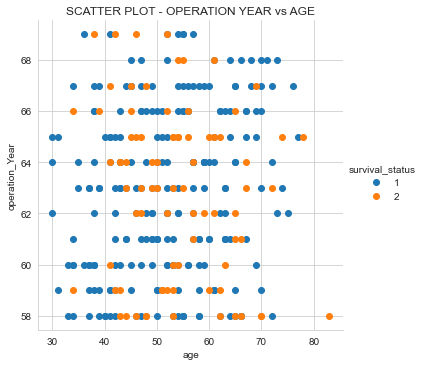

In [54]:
#SCATTERPLOT :- y-axis = OPERATION_YEAR
#               x axis = AGE 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status",height=5)\
   .map(plt.scatter,"age","operation_Year")\
   .add_legend();
plt.title("SCATTER PLOT - OPERATION YEAR vs AGE");
plt.show();

## **OBSERVATION(from scatterplot) : YEAR VS AGE**

From the given scatterplot, it can be observed that it hard to separate the blue points and the orange points.
Hence the scatterplot of YEARvsAGE does not provide any conclusive result.

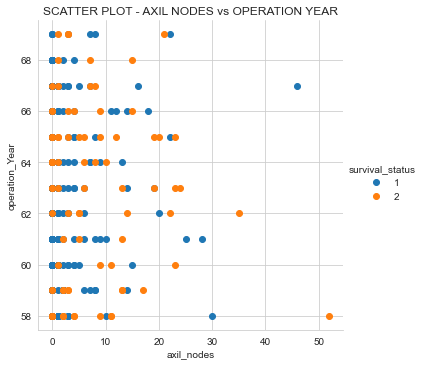

In [56]:
#SCATTERPLOT :- y-axis = OPERATION_YEAR
#               x axis = AXIL NODES
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=5)\
   .map(plt.scatter, "axil_nodes", "operation_Year")\
   .add_legend();
plt.title("SCATTER PLOT - AXIL NODES vs OPERATION YEAR");
plt.show();

## **OBSERVATION(from scatterplot) : AXIL NODES VS YEAR**
It can be inferred that the blue points and orange points are clustered together and it is not possible to separate them.

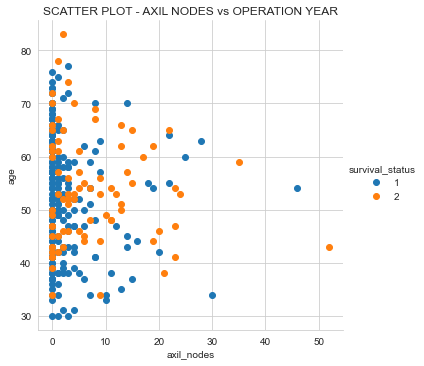

In [58]:
#SCATTERPLOT :- y-axis = age
#               x axis = AXIL NODES
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=5)\
   .map(plt.scatter, "axil_nodes", "age")\
   .add_legend();
plt.title("SCATTER PLOT - AXIL NODES vs OPERATION YEAR");
plt.show();

## **OBSERVATION(from scatterplot) : AXIL NODES VS AGE**
Due to clustering of points, it is not possible to determine the survival of the patient on the basis pf the scatterplot with 
feature axil_nodes and age.

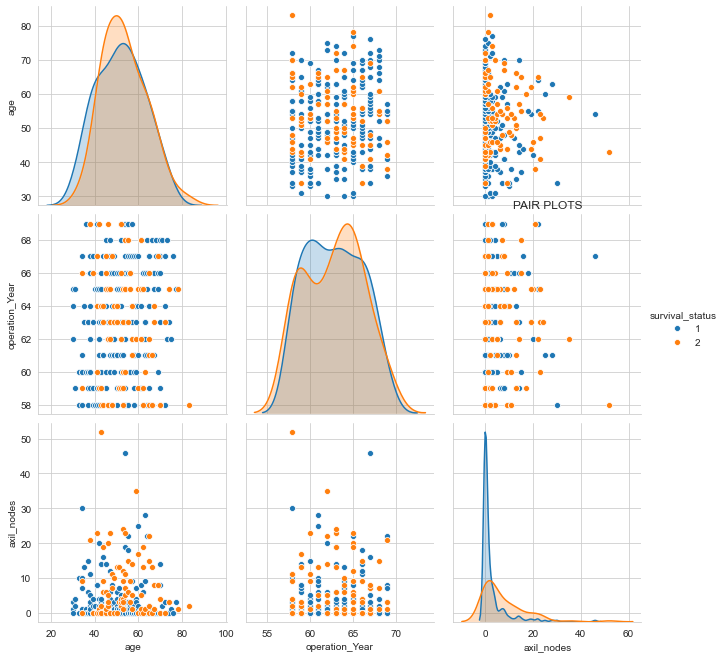

In [52]:
#PAIR-PLOTS
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", height=3);
plt.title("PAIR PLOTS");
plt.show();


## **OBSERVATION(from pairplot):**
1. Number of combinations = 3C2 = 3 plots.
2. From the pairplots, it is not possible to separate the two classes. The blue and orange points cannot be easily separated.
3. The patient has a survival probability of 100% when the axil nodes are equal to zero.

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

# OVERALL CONCLUSIONS:
### From PDF's and CDF's:
1. The probability of survival is high when the axil nodes lie within the range [0,4].
2. 50% of the patients survived with axil nodes less than or equal to 0.
3. 79% of the patients survived with axil nodes in the range [0,3].
4. About 92% of the patients survived 5 years or longer with axil nodes less than 10.
5. If the patients axil nodes lie within the range [0,4], he or she has 83.4% probability of survival.
6. It can be inferred that if the axil nodes are less than or equal to zero, the patient belongs to CLASS 1 i.e., the patient 
   survives for 5 years or longer.
7. If the axil nodes are greater than 3, the patient has short survival.
8. As the number of axil nodes increase the patient the less likely to survive.

### From boxplots and violinplots:
1. The boxplot corresponding to survival_status = 1 (CLASS 1) has a number of outliers. 
2. The boxplot corresponding to survival_status = 2 (CLASS 2) has one outlier.
3. The patients with axil_nodes less than or equal to zero survived.
4. The patients with axil_nodes greater than one did not survive.
5. As the number of axil_nodes increase, the patient is more likely to not survive.

### From statistical analysis:
MEDIAN OF AXIL NODES COULD BE USED TO DETERMINE IF THE PATIENT BELONGS TO CLASS 1 OR CLASS 2

### From pairplots and scatterplots
1. The two classes cannot be linearly separated.
2. The probability of survival is 100% when the patient has zero axil nodes.
3. Order of significance of features : axil_nodes > operation_Year > age.